# Coursework 2

**The  objective** of  this  coursework  is  to  experiment  with  various  metrics  and  data  representations  to observe their properties.

**Dataset**: Available in blackboard.  It includes 520 face images of 52 people.  There are 10 images per person thus 52 classes.

**Retrieval**: Perform k-nearest neighbour (kNN) face retrieval experiments according to standard practices in pattern recognition. Use retrieval accuracy (i.e. @rank1, @rank10) and mean average precision (mAP)  as  the  performance  metric  to  evaluate  different  methods.   Thus  each  method  will  have  three performance scores.

**Report the performance for all experiments using tables or figures, then analyse the results and draw conclusions.**

In [24]:
import sklearn
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D  
from tabulate import tabulate
from cw2_library import *

#######################
%matplotlib inline
%reload_ext autoreload
%autoreload 2
np.random.seed(0) #for reproducibility (NOTE: notebook has)

In [132]:
# DEFINE CONSTANTS
picH = 56
picW = 46
SAMPLES = 520
FIGURE_NO = 1

In [133]:
# IMPORT DATASET
FILENAME = os.path.join(os.getcwd(), "face.mat")
dataset = sio.loadmat(FILENAME)
faces = np.array(dataset["X"]).transpose()
for i in range(len(faces)):
    faces[i] = np.rot90(np.array(faces[i]).reshape(picW, picH), k=-1).reshape(picW*picH)
labels = np.array(dataset["l"]).transpose().reshape(SAMPLES)

print("Faces imported:  {}\tShape of each face: {}".format(faces.shape[0], faces[0].shape))
print("Labels imported: {}\tSamples per class:  10".format(labels.shape[0]))

Faces imported:  520	Shape of each face: (2576,)
Labels imported: 520	Samples per class:  10


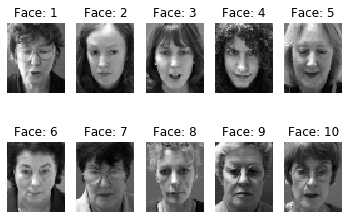

In [134]:
# SHOW EXAMPLE FACES
for i in range(10):
    plt.subplot(2,5,i+1)
    index = i*10
    show_image(faces[index], label="Face: {}".format(labels[index]), independent=False, axis=False)

***
***
***
***
## Q1.  [25 marks]Distance Metrics

### A.Data.
Prepare 520 of 2576-dimensional vectors by:
- a)  Using original unmodified images as feature vectors.
- b)  Normalizing feature vectors to unit norm L2.

Partition the data into training and testing set as follows:
- First 320 images (classes 1-32) as the training split.
- Remaining 200 images (classes 33-52) as the test split.

Note:  Report all results by providing performance scores @rank1, @rank10 and mAP for the test split.


In [135]:
#################
#### PART 1A ####
#################

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, np.array(labels), normalize=True)

print("Training set --->", len(train_faces), "samples")
print("Test set ------->", len(test_faces), "samples")


Training set ---> 320 samples
Test set -------> 200 samples


### B.  [3 marks]Baseline.
Perform retrieval with kNN on features from A.a and A.b, using standard non-learned distance metrics discussed in the lecture.

In [ ]:
#################
#### PART 1B ####
#################

metrics = ['euclidean','manhattan','chebyshev','cosine','cross_correlation']

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=True)

test_labels = test_labels - 33

scores_normalized = {}

for metric in tqdm(metrics):
    scores_normalized[metric] = get_scores(test_faces, test_labels, metric=metric)

In [ ]:
print(tabulate(scores_normalized, headers="keys", tablefmt='fancy_grid'))

In [ ]:
#################
#### PART 1B ####
#################

metrics = ['euclidean','manhattan','chebyshev','cosine','cross_correlation']

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=False)

test_labels = test_labels - 33

scores_raw = {}

for metric in tqdm(metrics):
    scores_raw[metric] = get_scores(test_faces, test_labels, metric=metric)

In [ ]:
print(tabulate(scores_raw, headers="keys", tablefmt='fancy_grid'))

### C.  [4 marks]Experiment 1.
Implement histogram of pixel intensities as the feature representations (consider different ways of choosing bins or quantities different than pixel intensities) and use standard non-learned distance metrics discussed in the lecture to evaluate the performance.

In [136]:
#################
#### PART 1C ####
#################

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, np.array(labels), normalize=True)

test_labels = test_labels - 33

binrange = np.arange(10,200,10)
hist_metrics = ['chi_square', 'intersection', 'earth_mover']
# hist_metrics = ['chi_square']

acc1_dict = {}
acc10_dict = {}
mAP_dict = {}

for metric in tqdm(hist_metrics):
    acc1_dict[metric] = []
    acc10_dict[metric] = []
    mAP_dict[metric] = []
    for bins in tqdm(binrange):

        hist_faces = project_to_histogram(test_faces, bins=bins)

        acc1, acc10, mAP = get_scores(hist_faces, test_labels, metric=metric)
        acc1_dict[metric].append(acc1)
        acc10_dict[metric].append(acc10)
        mAP_dict[metric].append(mAP)

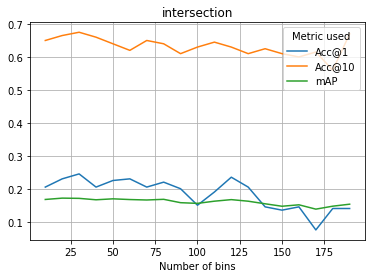

0.245 0.675 0.1714724722629589


In [137]:
metric = 'intersection'

plt.plot(binrange, acc1_dict[metric], label='Acc@1')
plt.plot(binrange, acc10_dict[metric], label='Acc@10')
plt.plot(binrange, mAP_dict[metric], label='mAP')
plt.legend(title="Metric used", loc='upper right')
plt.title(metric)
plt.xlabel('Number of bins')
plt.grid()
plt.show()
print(max(acc1_dict[metric]), max(acc10_dict[metric]), max(mAP_dict[metric]))

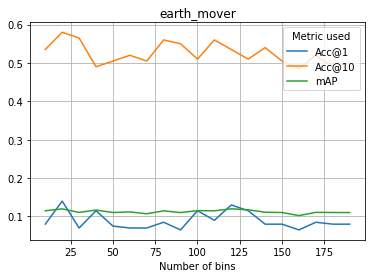

0.14 0.58 0.12004139723966624


In [138]:
metric = 'earth_mover'

plt.plot(binrange, acc1_dict[metric], label='Acc@1')
plt.plot(binrange, acc10_dict[metric], label='Acc@10')
plt.plot(binrange, mAP_dict[metric], label='mAP')
plt.legend(title="Metric used", loc='upper right')
plt.title(metric)
plt.xlabel('Number of bins')
plt.grid()
plt.show()
print(max(acc1_dict[metric]), max(acc10_dict[metric]), max(mAP_dict[metric]))

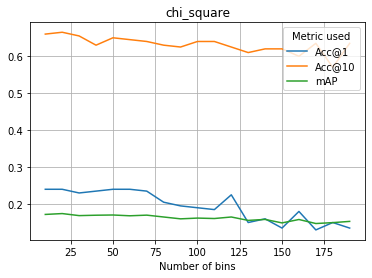

0.24 0.665 0.17423993323780618


In [139]:
metric = 'chi_square'

plt.plot(binrange, acc1_dict[metric], label='Acc@1')
plt.plot(binrange, acc10_dict[metric], label='Acc@10')
plt.plot(binrange, mAP_dict[metric], label='mAP')
plt.legend(title="Metric used", loc='upper right')
plt.title(metric)
plt.xlabel('Number of bins')
plt.grid()
plt.show()
print(max(acc1_dict[metric]), max(acc10_dict[metric]), max(mAP_dict[metric]))

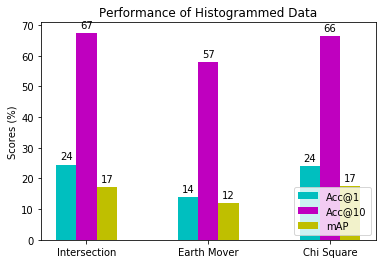

In [143]:
n_groups = 3
# metrics = [nearest200_manhattan, nearest200_euclidean, nearest200_city, nearest200_cosine, nearest200_correlation]
# metrics_n = [nearest200_manhattan_n, nearest200_euclidean_n, nearest200_city_n, nearest200_cosine_n, nearest200_correlation_n]

# rank1s = []
# rank10s = []
# maPs = []

# for neighbors in metrics_n:
#     results = evaluatePerformance(neighbors, testing_l, 10)
#     rank1s.append(results[0]*100)
#     rank10s.append(results[1]*100)
#     maPs.append(results[2]*100)

labels_list = ['Intersection', 'Earth Mover', 'Chi Square']
width = 0.5

rank1s = [max(acc1_dict['intersection'])*100, max(acc1_dict['earth_mover'])*100, max(acc1_dict['chi_square'])*100]
rank10s = [max(acc10_dict['intersection'])*100, max(acc10_dict['earth_mover'])*100, max(acc10_dict['chi_square'])*100]
maPs = [max(mAP_dict['intersection'])*100, max(mAP_dict['earth_mover'])*100, max(mAP_dict['chi_square'])*100]

x = np.arange(len(labels_list))
fig, ax =plt.subplots()
rects1 = ax.bar(x - width/3, rank1s, width/3, label="Acc@1", color="c")
rects10 = ax.bar(x, rank10s, width/3, label="Acc@10", color="m")
rectsMAP = ax.bar(x + width/3, maPs, width/3, label="mAP", color="y")



ax.set_ylabel("Scores (%)")
ax.set_title("Performance of Histogrammed Data")
ax.set_xticks(x)
ax.set_xticklabels(labels_list)
ax.legend(loc="lower right")

def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects10)
autolabel(rectsMAP)


plt.show()

### D.  [5 marks]Experiment 2.
Implement Mahalanobis distance metric by calculating covariance matrix on the training split of features in A and report the performance by applying it to the test split.  Use it to reduce the dimensionality to{16,32,64,128,256}.  More details can be found in [2].

In [ ]:
#################
#### PART 1D ####
#################

### Mahalanobis

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=True)

if test_labels[0] != 0:
    test_labels = test_labels - 33

inv_cov_matrix = np.linalg.inv(np.cov(test_faces.T))

acc1, acc10, mAP = get_scores(test_faces, test_labels, metric='mahalanobis', arg=inv_cov_matrix)
print(acc1,acc10,mAP)

In [ ]:
train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=True)
lin_transform = get_lin_transform(train_faces)

proj_faces = np.matmul(lin_transform, test_faces.T).T

acc1, acc10, mAP = get_scores(proj_faces, test_labels, metric='euc_sqr')
print(acc1,acc10,mAP)

In [ ]:
### Mahalanobis w/ dim. reduction

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=True)
lin_transform = get_lin_transform(train_faces)

if test_labels[0] != 0:
    test_labels = test_labels - 33

dim_range = [16,32,64,128,256, 512, 1024, 1200]
acc1_list = []
acc10_list = []
mAP_list = []

for dim in tqdm(dim_range):
    
    proj_faces = np.matmul(lin_transform[:dim], test_faces.T).T

    acc1, acc10, mAP = get_scores(proj_faces, test_labels, metric='euc_sqr')
    acc1_list.append(acc1)
    acc10_list.append(acc10)
    mAP_list.append(mAP)


In [ ]:
plt.plot(dim_range, acc1_list, label='Acc@1')
plt.plot(dim_range, acc10_list, label='Acc@10')
plt.plot(dim_range, mAP_list, label='mAP')
plt.legend(title="Metric used", loc='upper right')
plt.title("mahalnobis with dimensionality reduction")
plt.xlabel('Number of dimensions')
plt.grid()
plt.show()
print(max(acc1_list), max(acc10_list), max(mAP_list))

### E.  [6 marks]Experiment 3.
Perform dimensionality reduction with PCA and LDA on feature vectors obtained in point A and C. Report your scores.

In [ ]:
#################
#### PART 1E ####
#################

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=True)

hist_train_faces = project_to_histogram(train_faces, bins=256)
hist_test_faces = project_to_histogram(test_faces, bins=256)

x_train, x_test = fisherface(hist_train_faces, train_labels, hist_test_faces, 60 , 15)

if test_labels[0] != 0:
    test_labels = test_labels - 33


acc1, acc10, mAP = get_scores(x_test, test_labels, metric='euclidean')
print(acc1, acc10, mAP)

In [ ]:
train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=True)

x_train, x_test = fisherface(train_faces, train_labels, test_faces, 207 , 25)

if test_labels[0] != 0:
    test_labels = test_labels - 33


acc1, acc10, mAP = get_scores(x_test, test_labels, metric='euclidean')
print(acc1, acc10, mAP)

### F.  [7 marks]Experiment 4.
Perform Mahalanobis metric learning:
- a)  Report results for at least one of the following distance metric learning techniques: RCA (Relevant Component Analysis), NCA (Neighborhood Components Analysis), LMNN (Large Margin Nearest Neighbors) and compare to D.
- b)  Optional. Consider using different distance metric learning method, a good overview is provided in [1].

In [124]:
#################
#### PART 1F ####
#################

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=True)

if test_labels[0] != 0:
    test_labels = test_labels - 33
 
x_train = nca(train_faces, train_labels, test_faces, 31)

acc1, acc10, mAP = get_scores(x_train, test_labels, metric='euclidean')
print(acc1, acc10, mAP)

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.785 0.99 0.5701672612501909


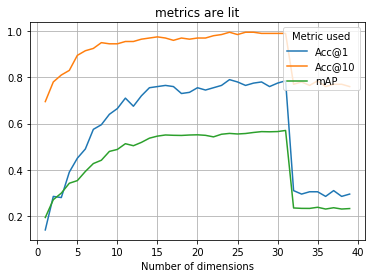

0.79 0.995 0.5701672612501909


In [119]:
plt.plot(n_comp_range, acc1_list, label='Acc@1')
plt.plot(n_comp_range, acc10_list, label='Acc@10')
plt.plot(n_comp_range, mAP_list, label='mAP')
plt.legend(title="Metric used", loc='upper right')
plt.title("metrics are lit")
plt.xlabel('Number of dimensions')
plt.grid()
plt.show()
print(max(acc1_list), max(acc10_list), max(mAP_list))

In [108]:
#################
#### PART 1F ####
#################

train_faces, train_labels, test_faces, test_labels = train_test_split(faces, labels, normalize=True)

if test_labels[0] != 0:
    test_labels = test_labels - 33
    
test_transformed = lmnn(train_faces, train_labels, test_faces)

acc1, acc10, mAP = get_scores(test_transformed, test_labels, metric='euclidean')
print(acc1, acc10, mAP)

It is


/usr/local/lib/python3.7/site-packages/metric_learn/lmnn.py:207: ChangedBehaviorWarning: Warning, no init was set (`init=None`). As of version 0.5.0, the default init will now be set to 'auto', instead of the previous identity matrix. If you still want to use the identity matrix as before, set init='identity'. This warning will disappear in v0.6.0, and `init` parameter's default value will be set to 'auto'.
  warnings.warn(msg, ChangedBehaviorWarning)


2 402392.55320009147 -142.61260404111817 892800 1.0099999999999999e-07
3 402247.8929811507 -144.66021894075675 892800 1.0201e-07
4 402101.149183764 -146.7437973867054 892800 1.030301e-07
5 401952.28506769665 -148.86411606735783 892800 1.0406040099999999e-07
6 401801.26309598767 -151.02197170897853 892800 1.0510100500999999e-07
7 401648.0449143123 -153.2181816753582 892800 1.0615201506009999e-07
8 401492.5913297287 -155.4535845835926 892800 1.0721353521070098e-07
9 401334.8622887862 -157.72904094250407 892800 1.08285670562808e-07
10 401174.81685497484 -160.04543381137773 892800 1.0936852726843608e-07
11 401012.4131854928 -162.40366948203882 892800 1.1046221254112044e-07
12 400847.6085073072 -164.8046781856101 892800 1.1156683466653164e-07
13 400680.3590924888 -167.2494148183614 892800 1.1268250301319696e-07
14 400510.62023279024 -169.73885969858384 892800 1.1380932804332893e-07
15 400338.34621344483 -172.2740193454083 892800 1.1494742132376222e-07
16 400163.4902861588 -174.8559272860293

NameError: name 'Print' is not defined

In [ ]:
plt.plot(n_comp_range, acc1_list, label='Acc@1')
plt.plot(n_comp_range, acc10_list, label='Acc@10')
plt.plot(n_comp_range, mAP_list, label='mAP')
plt.legend(title="Metric used", loc='upper right')
plt.title("metrics are lit")
plt.xlabel('Number of dimensions')
plt.grid()
plt.show()
print(max(acc1_list), max(acc10_list), max(mAP_list))

***
---
---
***
## Q2.  [25 marks]Cluster based representations

### A.Clustering.
- a)  Implement k-means clustering.
- b)  Use or implement Agglomerative clustering.

In [29]:
#################
#### PART 2A ####
#################
from kmeans import KMeans
from sklearn.cluster import AgglomerativeClustering

NCLASSES_TESTSET = 20 # Number of different classes in the test set
CLASS_OFFSET=52-NCLASSES_TESTSET
KMEANS_ITER = 50 # Number of times kmeans clustering is performed 
                 # until best solution is kept

kmeans_clustering = KMeans(n_clusters=NCLASSES_TESTSET)
agglom_clustering = AgglomerativeClustering(n_clusters=NCLASSES_TESTSET)


### B.  [10 marks]Experiment 5.
Perform clustering on the test data.   Propose and implement a method to assign label to the cluster (e.g.   Hungarian algorithm).   Report the labelling performance (@rank1 accuracy) for clusters from A.a and A.b. Based on the results choose A.a or A.b for the experiments in C.

Testing 50 different K-Means initializations...



====== K-Means Clustering ======
Population count per cluster:	[11  7 18  3  9  9 21 10  5  8 15  7 10 17 15 13  2  7  9  4]
Average cluster population:  	10.0
Inertia:                     	56.001
Label assigned to each cluster:	[36 44 41 40 46 49 51 35 38 47 42 48 52 34 37 39 50 45 43 33]
Average accuracy of clusters:	44.713	%
Overall accuracy:            	39.5	%


====== Agglomerative Clustering ======
Population count per cluster:	[15  7 15 11 10  6 18  9  5 18 10  6  9  6  7  5 19 13  4  7]
Average cluster population:  	10.0
Inertia:                     	54.953
Label assigned to each cluster:	[50 39 42 33 37 45 40 52 38 34 47 46 48 51 49 43 44 41 36 35]
Average accuracy of clusters:	42.488	%
Overall accuracy:            	36.0	%


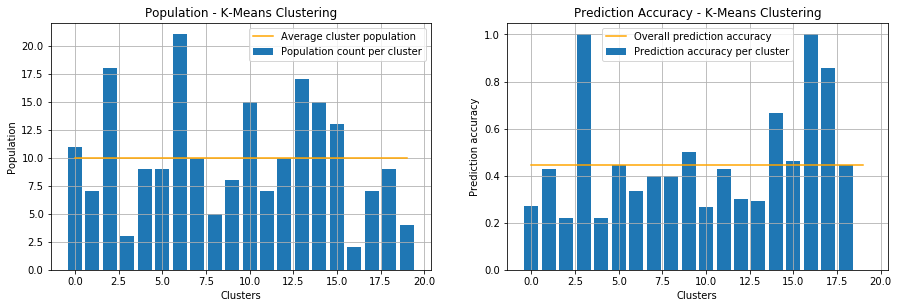

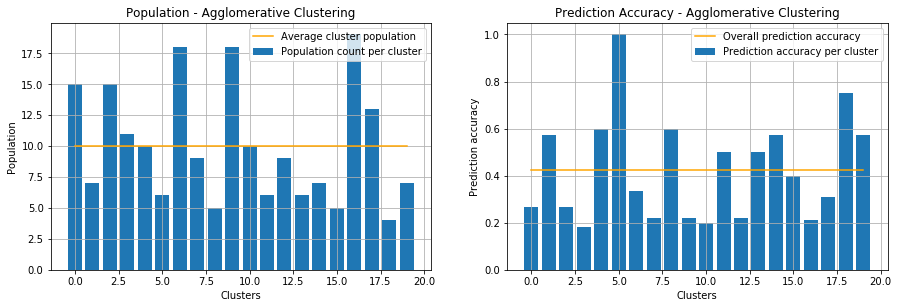

In [30]:
#################
#### PART 2B ####
#################

clustering_methods = [kmeans_clustering, agglom_clustering]
clustering_names = ["K-Means Clustering", "Agglomerative Clustering"]
clustering_accuracies = [None for _ in clustering_methods]


for i,method in enumerate(clustering_methods):
    if type(method)==KMeans: # DO KMEANS MULTIPLE TIMES AND TAKE BEST
        print("Testing {} different K-Means initializations...".format(KMEANS_ITER))
        trials = [KMeans(n_clusters=NCLASSES_TESTSET) for _ in range(KMEANS_ITER)]
        scores = [None for _ in range(KMEANS_ITER)]
        for idx,m in tqdm(enumerate(trials),total=KMEANS_ITER):
            # Perform clustering
            m = m.fit(test_faces)
            trials[idx] = m
            # Assign class labels to clusters
            cluster_labels = assign_labels_to_clusters(assigned_labels=m.labels_,
                                                    true_labels=test_labels,
                                                    n_clusters=NCLASSES_TESTSET,
                                                    class_offset=CLASS_OFFSET)
            # Compute prediction accuracy
            prediction_accuracies, overall_acc = get_labelledCluster_predictionAccuracy(
                                                    assigned_labels=m.labels_,
                                                    true_labels=test_labels,
                                                    cluster_labels=cluster_labels,
                                                    n_clusters=NCLASSES_TESTSET,
                                                    class_offset=CLASS_OFFSET)
            scores[idx] = overall_acc
        best_idx = np.argmax(scores)
        method = trials[best_idx]
        clustering_methods[i] = method
    
    else: # AgglomClustering --> regular fit
        # Perform clustering
        method = method.fit(test_faces)
        clustering_methods[i] = method
 
    # Check if clusters found are balances
    clusters_population = np.zeros(shape=NCLASSES_TESTSET,dtype=int)
    for l in method.labels_:
        clusters_population[l] += 1
    # Compute or retreive inertia value
    if type(method)==AgglomerativeClustering:
        inertia = get_agglomClustering_inertia(data=test_faces,
                                               labels=method.labels_,
                                               n_clusters=NCLASSES_TESTSET)
    else:
        inertia = method.inertia_
    # Assign class labels to clusters
    cluster_labels = assign_labels_to_clusters(assigned_labels=method.labels_,
                                            true_labels=test_labels,
                                            n_clusters=NCLASSES_TESTSET,
                                            class_offset=CLASS_OFFSET)
    # Compute prediction accuracy
    prediction_accuracies, overall_acc = get_labelledCluster_predictionAccuracy(
                                            assigned_labels=method.labels_,
                                            true_labels=test_labels,
                                            cluster_labels=cluster_labels,
                                            n_clusters=NCLASSES_TESTSET,
                                            class_offset=CLASS_OFFSET)
    
    clustering_accuracies[i] = overall_acc
    
    ##############################################################
    ##############################################################
    print("\n\n"*i,"====== ",clustering_names[i]," ======", sep="")    
    print("Population count per cluster:",clusters_population, sep="\t")
    print("Average cluster population:  ",np.mean(clusters_population), sep="\t")
    print("Inertia:                     ", round(inertia,3), sep="\t")
    print("Label assigned to each cluster:", cluster_labels, sep="\t")
    print("Average accuracy of clusters:", round(np.mean(prediction_accuracies)*100,3),"%", sep="\t")
    print("Overall accuracy:            ", round(overall_acc*100,3),"%", sep="\t")
    
    plt.figure(figsize=(15,10))
    plt.subplot(len(clustering_methods),2,i*2+1)
    plt.bar(list(range(NCLASSES_TESTSET)), clusters_population,label="Population count per cluster")
    plt.plot(list(range(NCLASSES_TESTSET)), np.full(20,np.mean(clusters_population)),color="orange", label="Average cluster population")
    plt.legend()
    plt.grid()
    plt.xlabel("Clusters")
    plt.ylabel("Population")
    plt.title("Population - "+clustering_names[i])
    
    plt.subplot(len(clustering_methods),2, i*2+2)
    plt.bar(list(range(NCLASSES_TESTSET)),prediction_accuracies, label="Prediction accuracy per cluster")
    plt.plot(np.full(NCLASSES_TESTSET,np.mean(prediction_accuracies)),color="orange", label="Overall prediction accuracy")
    plt.legend()
    plt.grid()
    plt.xlabel("Clusters")
    plt.ylabel("Prediction accuracy")
    plt.title("Prediction Accuracy - "+clustering_names[i])
    
    

In [31]:

method_idx = np.argmax(clustering_accuracies)
## DEBUG
method_idx = 0
##
method = clustering_methods[method_idx]
method_name = clustering_names[method_idx]
method_accuracy = clustering_accuracies[method_idx]
if type(method)==AgglomerativeClustering:
    method_centroids = get_agglomClustering_centroids(test_faces,method.labels_,NCLASSES_TESTSET)
else:
    method_centroids = method.cluster_centers_
print("Clustering method chosen -->",method_name, sep="\t")
print("Classification Accuracy  -->\t",round(method_accuracy*100,3)," %", sep="")

Clustering method chosen -->	K-Means Clustering
Classification Accuracy  -->	39.5 %


### C.Fisher vectors.
Obtain new representations of images:
- a)  Use cluster centres as a codebook and then vectors of distances to the cluster centres as feature vectors.
- b)  Consider using softmax probabilities of inverse distances to cluster centres as your vector representation.
- c)  Obtain Fisher vectors from GMM as described in lecture notes. Note that you can obtain GMM representation based on clusters obtained in B.

Note:  Use the training split to obtain the codebook and GMM and calculate new representations for the test split. Consider different numbers of gaussians/clusters.

In [74]:
#### #### PART 2C ####
#################
def generate_new_representations(data, clustering_method, n_features):
    clustering=None
    
    if clustering_method == "K-Means Clustering":
        clustering = KMeans(n_clusters=n_features)
        clustering = clustering.fit(train_faces)
    else:
        raise NotImplementedError
        
    ### a) VECTORS OF DISTANCES TO CENTERS
    a_data = clustering.project(data, rule="distance_to_center")

    ### b) VECTORS OF SOFTMAX PROBABILITY OF INVERSE DISTANCES TO CENTRES
    b_data = clustering.project(data, rule="softmax_inverse_distance")
    
    ### c) FISHER VECTOR FROM GMM
    c_data = clustering.project(data, rule="fisher_vector_gmm", training_set=train_faces)
    
    return a_data, b_data, c_data
####################################
repeated_test_faces = []
a_representations = []
b_representations = []
c_representations = []

n_features_list = [(i+1)*10 for i in range(30)]
# n_features_list = [10,50,100,200]
# n_features_list = [20,40]
for i,n_features in tqdm(enumerate(n_features_list), total=len(n_features_list)):
    a_test_faces, b_test_faces, c_test_faces = generate_new_representations(test_faces,method_name,n_features)
    repeated_test_faces.append(test_faces)
    a_representations.append(a_test_faces)
    b_representations.append(b_test_faces)
    c_representations.append(c_test_faces)

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/kmeans.py:69: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.absolute(np.cov(np.array(cluster).T))
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_norma

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/kmeans.py:69: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.absolute(np.cov(np.array(cluster).T))
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_norma

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/kmeans.py:69: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.absolute(np.cov(np.array(cluster).T))
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_norma

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/kmeans.py:69: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.absolute(np.cov(np.array(cluster).T))
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_norma

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/kmeans.py:69: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.absolute(np.cov(np.array(cluster).T))
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_norma

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/kmeans.py:69: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.absolute(np.cov(np.array(cluster).T))
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_norma

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/kmeans.py:69: RuntimeWarning: Degrees of freedom <= 0 f

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/kmeans.py:69: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.absolute(np.cov(np.array(cluster).T))
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_norma

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encountered in sqrt
  fv_normalized = np.sqrt(fv_normalized)
/Users/mateosarja/Documents/Uni/Year 4/PatternRec/patternRec_cw2/cw2_library.py:588: RuntimeWarning: invalid value encou

In [75]:
print(len(c_representations))
print(len(c_representations[0]))

print(len(c_representations[0][0]))


30
200
51520


### D.  [15 marks]Experiment 6.
Report results for representations from C.a, C.b and C.c.

In [76]:
#################
#### PART 2D ####
#################
feature_representations = [repeated_test_faces,
                           a_representations, 
                           b_representations, 
                           c_representations]
# feature_representations = [repeated_test_faces ,a_representations, b_representations]
feature_representations_names = ["Pixel Intensity (normalized w/ L2 norm)",
                                 "Distances to centers", 
                                 "Softmax of inverse distances to centers",
                                 "Fisher vectors from GMM"]
scores = []

baseline_score = get_scores(repeated_test_faces[0], test_labels-CLASS_OFFSET-1)
representation_scores = [[],[],[]]
for idx in range(3):
    for _ in repeated_test_faces:
        representation_scores[idx].append(baseline_score[idx])
scores.append(representation_scores)
for idx,data in enumerate(feature_representations[1:]):
    i=idx+1
    print("Calculating scores for -->",feature_representations_names[i])
    representation_scores = [[],[],[]]
    for i in tqdm(range(len(n_features_list))): 
        score = get_scores(np.array(data[i]), test_labels-CLASS_OFFSET-1)
        for idx in range(3): 
            representation_scores[idx].append(score[idx])
    scores.append(representation_scores)


print("Scores shape:",np.array(scores).shape)

Calculating scores for --> Distances to centers



Calculating scores for --> Softmax of inverse distances to centers



Calculating scores for --> Fisher vectors from GMM



Scores shape: (4, 3, 30)


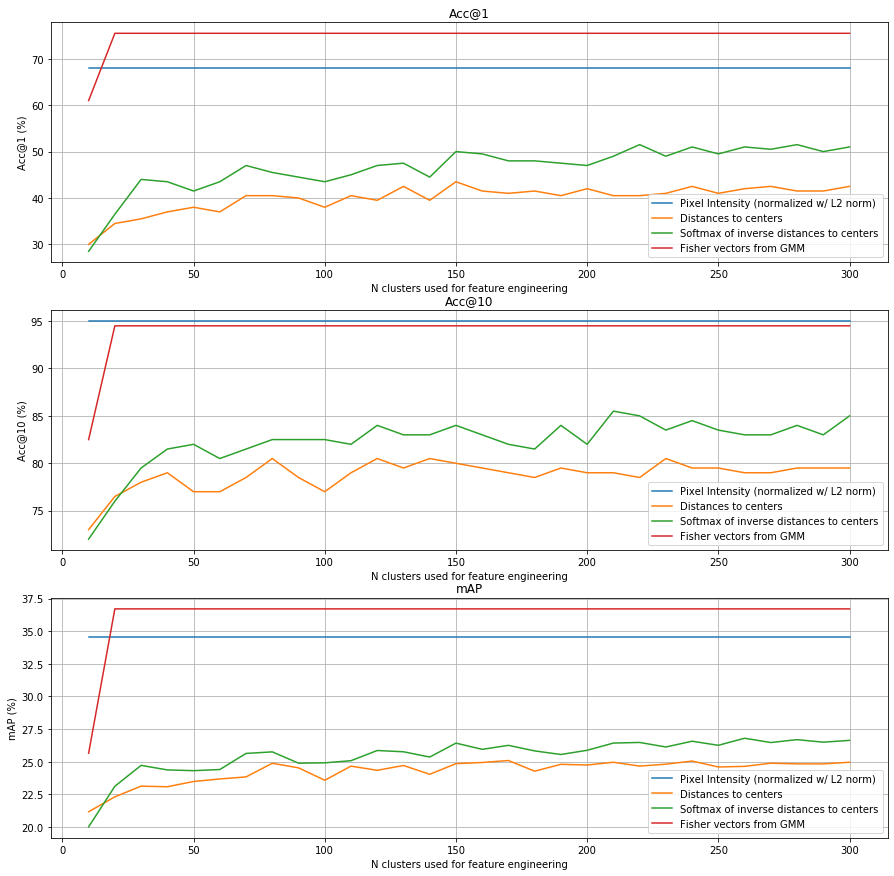

In [81]:
score_names = ["Acc@1","Acc@10","mAP"]
plt.figure(figsize=(15,15))

for j,score_name in enumerate(score_names):
    plt.subplot(3,1,j+1)
    for i,method_scores in enumerate(scores): 
        
        plt.plot(n_features_list, np.multiply(method_scores[j],[100 for _ in method_scores[j]]), label=feature_representations_names[i])
    plt.legend()
    plt.grid()
    plt.xlabel("N clusters used for feature engineering")
    plt.ylabel(score_name+" (%)")
    plt.title(score_name)    

In [102]:
scores[3]

[[0.61,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755,
  0.755],
 [0.825,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945,
  0.945],
 [0.25657255523082817,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,
  0.36706306510777476,